# Einlesen der Daten

In [106]:
import pandas as pd

df = pd.read_csv('dataset.csv').dropna()
df['n_chars'] = df.text.apply(lambda x: len(x)) 

# Trennen von Trainings- und Testdaten

In [105]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, random_state=42, test_size=0.2)

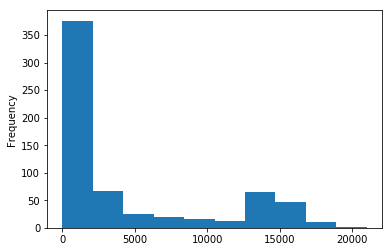

In [109]:
df.n_chars.plot(kind='hist')

# Feature Extraction

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words

tf = TfidfVectorizer(get_stop_words('de'), max_features=20000)

X_train = tf.fit_transform(df_train.text)
X_test = tf.transform(df_test.text)

In [36]:
y_train = df_train.genre
y_test = df_test.genre

In [37]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((510, 20000), (510,), (128, 20000), (128,))

In [38]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        DRAM       0.24      0.31      0.27        13
        HUMA       0.17      0.07      0.10        15
        LEGA       0.00      0.00      0.00        13
        NARR       0.00      0.00      0.00        16
        NEWS       0.38      0.95      0.55        38
        SCIE       0.00      0.00      0.00        18
        SERM       0.36      0.27      0.31        15

    accuracy                           0.35       128
   macro avg       0.16      0.23      0.17       128
weighted avg       0.20      0.35      0.24       128



/Users/lennartkeller/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        DRAM       0.24      0.31      0.27        13
        HUMA       0.00      0.00      0.00        15
        LEGA       1.00      0.23      0.38        13
        NARR       0.81      0.81      0.81        16
        NEWS       0.55      0.95      0.70        38
        SCIE       0.43      0.33      0.38        18
        SERM       0.36      0.27      0.31        15

    accuracy                           0.52       128
   macro avg       0.48      0.41      0.41       128
weighted avg       0.49      0.52      0.46       128



/Users/lennartkeller/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lennartkeller/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [40]:
from sklearn.svm import LinearSVC

lin_svm = LinearSVC(C=2)
lin_svm.fit(X_train, y_train)
y_pred = lin_svm.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        DRAM       0.29      0.46      0.35        13
        HUMA       0.00      0.00      0.00        15
        LEGA       1.00      0.92      0.96        13
        NARR       1.00      0.81      0.90        16
        NEWS       0.69      0.89      0.78        38
        SCIE       0.43      0.33      0.38        18
        SERM       0.56      0.60      0.58        15

    accuracy                           0.62       128
   macro avg       0.57      0.58      0.56       128
weighted avg       0.59      0.62      0.60       128



In [41]:
from sklearn.svm import SVC

rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
y_pred = rbf_svm.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

/Users/lennartkeller/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

        DRAM       0.00      0.00      0.00        13
        HUMA       0.00      0.00      0.00        15
        LEGA       0.00      0.00      0.00        13
        NARR       0.00      0.00      0.00        16
        NEWS       0.30      1.00      0.46        38
        SCIE       0.00      0.00      0.00        18
        SERM       0.00      0.00      0.00        15

    accuracy                           0.30       128
   macro avg       0.04      0.14      0.07       128
weighted avg       0.09      0.30      0.14       128



/Users/lennartkeller/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        DRAM       0.27      0.46      0.34        13
        HUMA       0.20      0.13      0.16        15
        LEGA       0.85      0.85      0.85        13
        NARR       0.85      0.69      0.76        16
        NEWS       0.65      0.74      0.69        38
        SCIE       0.50      0.28      0.36        18
        SERM       0.41      0.47      0.44        15

    accuracy                           0.55       128
   macro avg       0.53      0.52      0.51       128
weighted avg       0.55      0.55      0.54       128



In [43]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

/Users/lennartkeller/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

        DRAM       0.00      0.00      0.00        13
        HUMA       0.37      0.47      0.41        15
        LEGA       0.83      0.77      0.80        13
        NARR       0.73      0.50      0.59        16
        NEWS       0.67      0.89      0.76        38
        SCIE       0.43      0.33      0.38        18
        SERM       0.44      0.47      0.45        15

    accuracy                           0.56       128
   macro avg       0.49      0.49      0.49       128
weighted avg       0.53      0.56      0.54       128



In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

ada_boost = AdaBoostClassifier(
    base_estimator=SGDClassifier(
        loss='hinge',
        max_iter=50,
        learning_rate='adaptive',
        eta0=0.01,
        penalty='l2'),
    algorithm='SAMME')
ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

/Users/lennartkeller/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


              precision    recall  f1-score   support

        DRAM       0.50      0.15      0.24        13
        HUMA       0.29      0.67      0.41        15
        LEGA       0.00      0.00      0.00        13
        NARR       0.93      0.81      0.87        16
        NEWS       0.58      0.84      0.69        38
        SCIE       0.60      0.17      0.26        18
        SERM       0.56      0.60      0.58        15

    accuracy                           0.54       128
   macro avg       0.50      0.46      0.43       128
weighted avg       0.52      0.54      0.49       128



/Users/lennartkeller/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [45]:
from xgboost.sklearn import XGBClassifier

grad_boost = XGBClassifier()
grad_boost.fit(X_train, y_train)
y_pred = grad_boost.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        DRAM       0.24      0.31      0.27        13
        HUMA       0.17      0.07      0.10        15
        LEGA       1.00      1.00      1.00        13
        NARR       0.80      0.75      0.77        16
        NEWS       0.69      0.95      0.80        38
        SCIE       0.50      0.28      0.36        18
        SERM       0.47      0.47      0.47        15

    accuracy                           0.61       128
   macro avg       0.55      0.55      0.54       128
weighted avg       0.58      0.61      0.58       128



In [46]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_sklean = GradientBoostingClassifier()
grad_boost_sklean.fit(X_train, y_train)
y_pred = grad_boost_sklean.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        DRAM       0.28      0.38      0.32        13
        HUMA       0.00      0.00      0.00        15
        LEGA       1.00      1.00      1.00        13
        NARR       0.73      0.69      0.71        16
        NEWS       0.67      0.87      0.76        38
        SCIE       0.44      0.39      0.41        18
        SERM       0.40      0.40      0.40        15

    accuracy                           0.59       128
   macro avg       0.50      0.53      0.51       128
weighted avg       0.53      0.59      0.55       128



In [47]:
from keras.preprocessing.text import Tokenizer

tok = Tokenizer(num_words=20000)
tok.fit_on_texts(df_train.text)

Xk_train = tok.texts_to_matrix(df_train.text)
Xk_test = tok.texts_to_matrix(df_test.text)

Using TensorFlow backend.
/Users/lennartkeller/anaconda3/envs/nlp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/lennartkeller/anaconda3/envs/nlp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/lennartkeller/anaconda3/envs/nlp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/User

In [55]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
yk_train = le.fit_transform(y_train)
yk_test = le.transform(y_test)

yk_train = to_categorical(yk_train)

from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Reshape

def build_model(num_words, n_classes, hiddenlayer_size=512, n_hiddenlayer=1):
    model = Sequential()
    model.add(Dense(hiddenlayer_size, input_shape=(num_words, ), activation='relu'))
    model.add(Dropout(0.5))
    for i in range(n_hiddenlayer):
        model.add(Dense(hiddenlayer_size, activation='relu'))
        model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [56]:
import numpy as np

model = build_model(20000,
                    len(np.unique(y_train)),
                    n_hiddenlayer=3,
                    hiddenlayer_size=512)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               10240512  
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
__________

In [57]:
history = model.fit(Xk_train, yk_train,
                    batch_size=32,
                    validation_split=0.1,
                    epochs=40)

Train on 459 samples, validate on 51 samples
Epoch 1/40
459/459 [==============================] - 3s 7ms/step - loss: 1.8319 - acc: 0.3508 - val_loss: 1.1698 - val_acc: 0.6078
Epoch 2/40
459/459 [==============================] - 2s 5ms/step - loss: 1.4133 - acc: 0.4662 - val_loss: 0.9674 - val_acc: 0.6667
Epoch 3/40
459/459 [==============================] - 2s 5ms/step - loss: 1.1730 - acc: 0.5316 - val_loss: 0.8567 - val_acc: 0.6471
Epoch 4/40
459/459 [==============================] - 2s 5ms/step - loss: 1.0799 - acc: 0.5621 - val_loss: 0.8324 - val_acc: 0.7059
Epoch 5/40
459/459 [==============================] - 3s 5ms/step - loss: 1.0061 - acc: 0.6187 - val_loss: 0.8609 - val_acc: 0.6863
Epoch 6/40
459/459 [==============================] - 3s 6ms/step - loss: 0.9162 - acc: 0.6449 - val_loss: 0.8478 - val_acc: 0.6863
Epoch 7/40
459/459 [==============================] - 2s 5ms/step - loss: 0.9057 - acc: 0.6209 - val_loss: 0.6927 - val_acc: 0.7451
Epoch 8/40
459/459 [===========

In [62]:
yk_pred = model.predict_classes(X_test)
print(classification_report(yk_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.12      1.00      0.22        15
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        16
           4       0.50      0.03      0.05        38
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00        15

    accuracy                           0.12       128
   macro avg       0.09      0.15      0.04       128
weighted avg       0.16      0.12      0.04       128



/Users/lennartkeller/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [100]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


NUM_WORDS = 5000
MAX_SEQ_LEN = 3000
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(df_train.text)

train_sequences = tokenizer.texts_to_sequences(df_train.text)
test_sequences = tokenizer.texts_to_sequences(df_test.text)

train_sequences = pad_sequences(train_sequences, maxlen=MAX_SEQ_LEN)
test_sequences = pad_sequences(test_sequences, maxlen=MAX_SEQ_LEN)

In [101]:
train_sequences.shape

(510, 3000)

In [93]:
from flair.embeddings import WordEmbeddings
from flair.data import Sentence
from tqdm import tqdm_notebook

def create_embedding_matrix(sequences, tokenizer: Tokenizer):
    X = []
    embedder = WordEmbeddings('de')
    for sequence in train_sequences:
        text = []
        for entry in sequence:
            text.append(tokenizer.index_word.get(entry, 'UNKOWN'))
        text_mat = []
        print(text[:4])
        flair_data = Sentence(" ".join(text))
        embedder.embed(flair_data)
        for token in flair_data:
            text_mat.append(token.embedding.cpu().detach().numpy())
        X.append(text_mat)
    return X

In [103]:
df_train.iloc[0].text

'ÿþV'

In [92]:
X_train[0]

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 